In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import matplotlib 

In [2]:
def BS_call_price(sigma, S, K, r, T, t):
    #Danner d1 og d2:
    #d1: Sandsynligheden for, at optionen ender ITM under det ækvivalente martingalmål med det underliggende aktiv som numeraire
    d1 = np.multiply(1. / (sigma*np.sqrt((T-t))),(np.log(S/K) + (r + sigma**2 / 2.) * (T-t)))
    
    #d2: Sandsynligheden for, at optionen ender ITM under det ækvivalente martingalmål med den risikofrie obligation som numeraire
    d2 = d1 - sigma * np.sqrt((T-t))
    
    #Udregner vores Call-pris:
    call = np.multiply(norm.cdf(d1),S) - np.multiply(norm.cdf(d2) * K, np.exp(-r * (T-t)))
    
    return call, d1, d2

In [3]:
K = 100
sigma = 0.2
r = 0.01
S = np.linspace(80, 120, 81)
times = [0.95, 0.9, 0.75, 0.5]
res = {}
T = 1

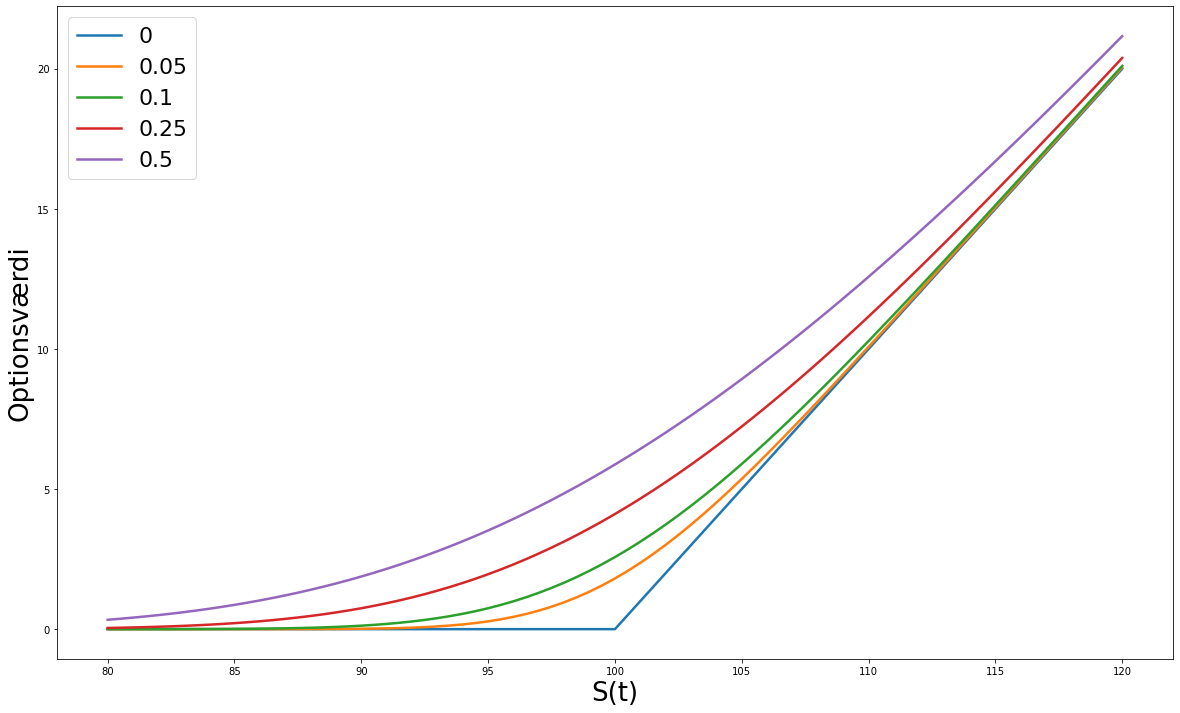

In [4]:
# compute option prices
for t in times:
    option_pris = BS_call_price(sigma, S, K, r, T, t)
    res[t] = option_pris[0]

# compute terminal payoff
call_payoff = [max(0, s - K) for s in S] #lille s er alle de værdier, som  


# plot
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(S, call_payoff, lw=2.5, label='0')
for l, ps in res.items():
    ax.plot(S, ps, lw=2.5, label=round(1-l,2))

# label
ax.set_xlabel('S(t)', fontsize=26)
ax.set_ylabel('Optionsværdi', fontsize=26)
ax.legend(fontsize=22);